In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_pickle('./df_prdf_hfo2.pkl')
df

,structure,name,Hf-Hf PRDF r=0.00-0.50,Hf-Hf PRDF r=0.50-1.00,Hf-Hf PRDF r=1.00-1.50,Hf-Hf PRDF r=1.50-2.00,Hf-Hf PRDF r=2.00-2.50,Hf-Hf PRDF r=2.50-3.00,Hf-Hf PRDF r=3.00-3.50,Hf-Hf PRDF r=3.50-4.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.092170,0.047391,...,0.055107,0.062309,0.062979,0.060304,0.052998,0.058736,0.069105,0.066106,0.044625,0.061557
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.100902,0.043016,...,0.064922,0.052085,0.072264,0.054968,0.053900,0.061388,0.062251,0.059881,0.061669,0.056598
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.086349,0.066347,...,0.062933,0.064374,0.063205,0.062147,0.060301,0.058499,0.064611,0.068638,0.056704,0.057656
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.011643,0.122488,...,0.069220,0.055092,0.069665,0.067288,0.045109,0.060441,0.079498,0.059499,0.058999,0.052926
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.090230,0.045204,...,0.055043,0.062229,0.062263,0.060197,0.054886,0.056100,0.069284,0.066318,0.045014,0.061532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.030077,0.113009,...,0.066034,0.054370,0.070663,0.066082,0.044792,0.058594,0.083739,0.055906,0.056475,0.059160
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.082710,0.040966,...,0.057523,0.055974,0.065088,0.062572,0.049204,0.056573,0.061132,0.068242,0.050168,0.051587
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.086470,0.038141,...,0.061073,0.055172,0.064222,0.061119,0.050207,0.055974,0.059758,0.065695,0.056637,0.053984
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.056393,0.088995,...,0.067788,0.054210,0.066595,0.062041,0.052881,0.057836,0.064327,0.064762,0.061549,0.052403


In [7]:
labels_true = pd.read_pickle('./data_labels/labels_hfo2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']
df.insert(loc=2, column='y_true', value=y_true)
y_true.values


array([0, 2, 1, ..., 2, 4, 3], dtype=int64)

In [8]:
from sklearn.utils import shuffle
X = df.iloc[:,3:]
X, y_true = shuffle(X, y_true, random_state=0)
X = X.values
X

array([[0.        , 0.        , 0.        , ..., 0.06371479, 0.05840811,
        0.05918585],
       [0.        , 0.        , 0.        , ..., 0.06872257, 0.04847658,
        0.05538633],
       [0.        , 0.        , 0.        , ..., 0.05477435, 0.05748206,
        0.05631708],
       ...,
       [0.        , 0.        , 0.        , ..., 0.05535435, 0.05882416,
        0.05589633],
       [0.        , 0.        , 0.        , ..., 0.06753428, 0.04922816,
        0.05492733],
       [0.        , 0.        , 0.        , ..., 0.07112743, 0.05467708,
        0.05877785]])

In [19]:
n_neighbors = 20
random_state = 0

In [20]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y_true, test_size=0.5, stratify=y_true,
                     random_state=random_state)

In [21]:

dim = len(X[0])
n_classes = len(np.unique(y_true))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))


In [22]:
# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)


In [23]:
# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

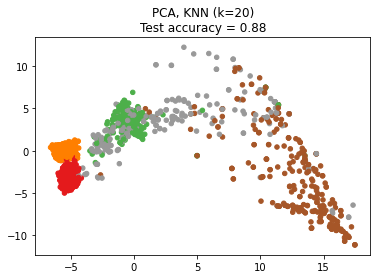

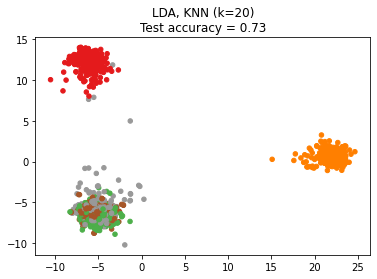

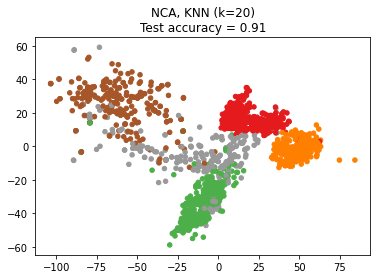

In [39]:
# plt.figure()
labels = {'0': 'red' ,'1': 'green','2': 'blue', '3': 'brown','4': 'yellow'}
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_true, s=20, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()

In [23]:
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y_true)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924638 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.923865 (0.011568) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.924058 (0.010752) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.898164 (0.009279) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.922899 (0.010467) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.924444 (0.010011) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.614300 (0.014375) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.924638 (0.010370) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.923478 (0.010989) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.266667 (0.000000) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.922512 (0.011760) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.884251 (0.009316) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.266667 (0.000000) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.907440 (0.009670) with: {'C': 0.01, 'gamma': 'scale'

In [25]:
from sklearn.model_selection import cross_val_score
svc = SVC(C=1.0, gamma='scale', kernel='poly')
scores = cross_val_score(svc, X, y_true, cv=5, scoring='accuracy')
print(scores.mean())

0.921159420289855


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)
scores = cross_val_score(gbc, X, y_true, cv=5, scoring='accuracy')
print(scores.mean())